# A Standard PyTorch Workflow

1. Get data ready (turn into tensors)
2. Build or pick a pretrained model (to suit your problem)
  
  ------2.1 Pick a loss function & optimizer

  ------2.2 Build a training loop

3. Fit the model to the data and make a prediction

4. Evaluate the model

5. Improve through experimentation

6. Save and reload your trained model

We're going to get `torch`, `torch.nn` (nn stands for neural network and this package contains the building blocks for creating neural networks in PyTorch) and `matplotlib`.

In [3]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.1+cu124'

1. Data (preparing and loading)

"Data" in machine learning can be almost anything you can imagine. A table of numbers (like a big Excel spreadsheet), images of any kind, videos (YouTube has lots of data!), audio files like songs or podcasts, protein structures, text and more.

Machine learning is a game of two parts:

1. Turn your data, whatever it is, into numbers (a representation).
2. Pick or build a model to learn the representation as best as possible.

Sometimes one and two can be done at the same time.

But what if you don't have data? Well, that's where we're at now.

No data. But we can create some. Let's create our data as a straight line.

We'll use [linear regression](https://en.wikipedia.org/wiki/Linear_regression) to create the data with known **parameters** (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent).

In [4]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Now we move towards building a model that can learn the relationship between `X` (features) and `y` (labels).

Split data into training and test sets

We've got some data. But before we build a model we need to split it up.

One of most important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each split of the dataset serves a specific purpose:

**Training set**:
The model learns from this data(like the course materials you study during the semester).

~60-80% of total data

Always used

**Validation set**:
The model gets tuned on this data (like the practice exam you take before the final exam).

~10-20% of total data

Often but not always used

**Testing set**:
The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester).

~10-20% of total data

Always used


In [5]:
#For this start, we'll use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.
#We can create them by splitting our X and y tensors.

**Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn from training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.

In [6]:
# Create train/test split to get 40 samples for training (X_train & y_train) and 10 samples for testing (X_test & y_test).
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
#create a function to visualize it
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

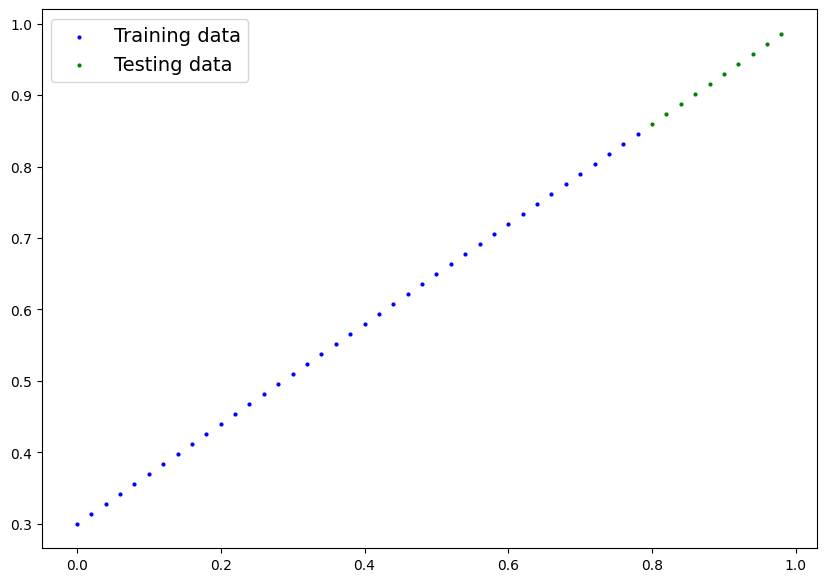

In [8]:
plot_predictions();

#2. Build model
Build a model to use the blue dots to predict the green dots.

Replicate a standard linear regression model using pure PyTorch.

Ues Python classes to create bits and pieces for building neural networks.

Refresh on OOP: [Real Python's Object Orientating programming in Python 3 guide](https://realpython.com/python3-object-oriented-programming/)

In [9]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

#PyTorch model building essentials

PyTorch has 4 (give or take) essential modules you can use to create almost any kind of neural network you can imagine:

#1. [ torch.nn](https://pytorch.org/docs/stable/nn.html),

Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).

#2. [ torch.optim](https://pytorch.org/docs/stable/optim.html),

Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss).


#3. [ torch.utils.data.Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset),


#4. [ torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html).


#[torch.nn.Parameter](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter)

Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [gradient descent](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)) are calculated automatically, this is often referred to as "autograd".


#[torch.nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)

The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented.

#def forward()

All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above).



###Almost everything in a PyTorch neural network comes from torch.nn:

* `nn.Module` contains the larger building blocks (layers)

* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))

* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within `nn.Module`(s)

* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

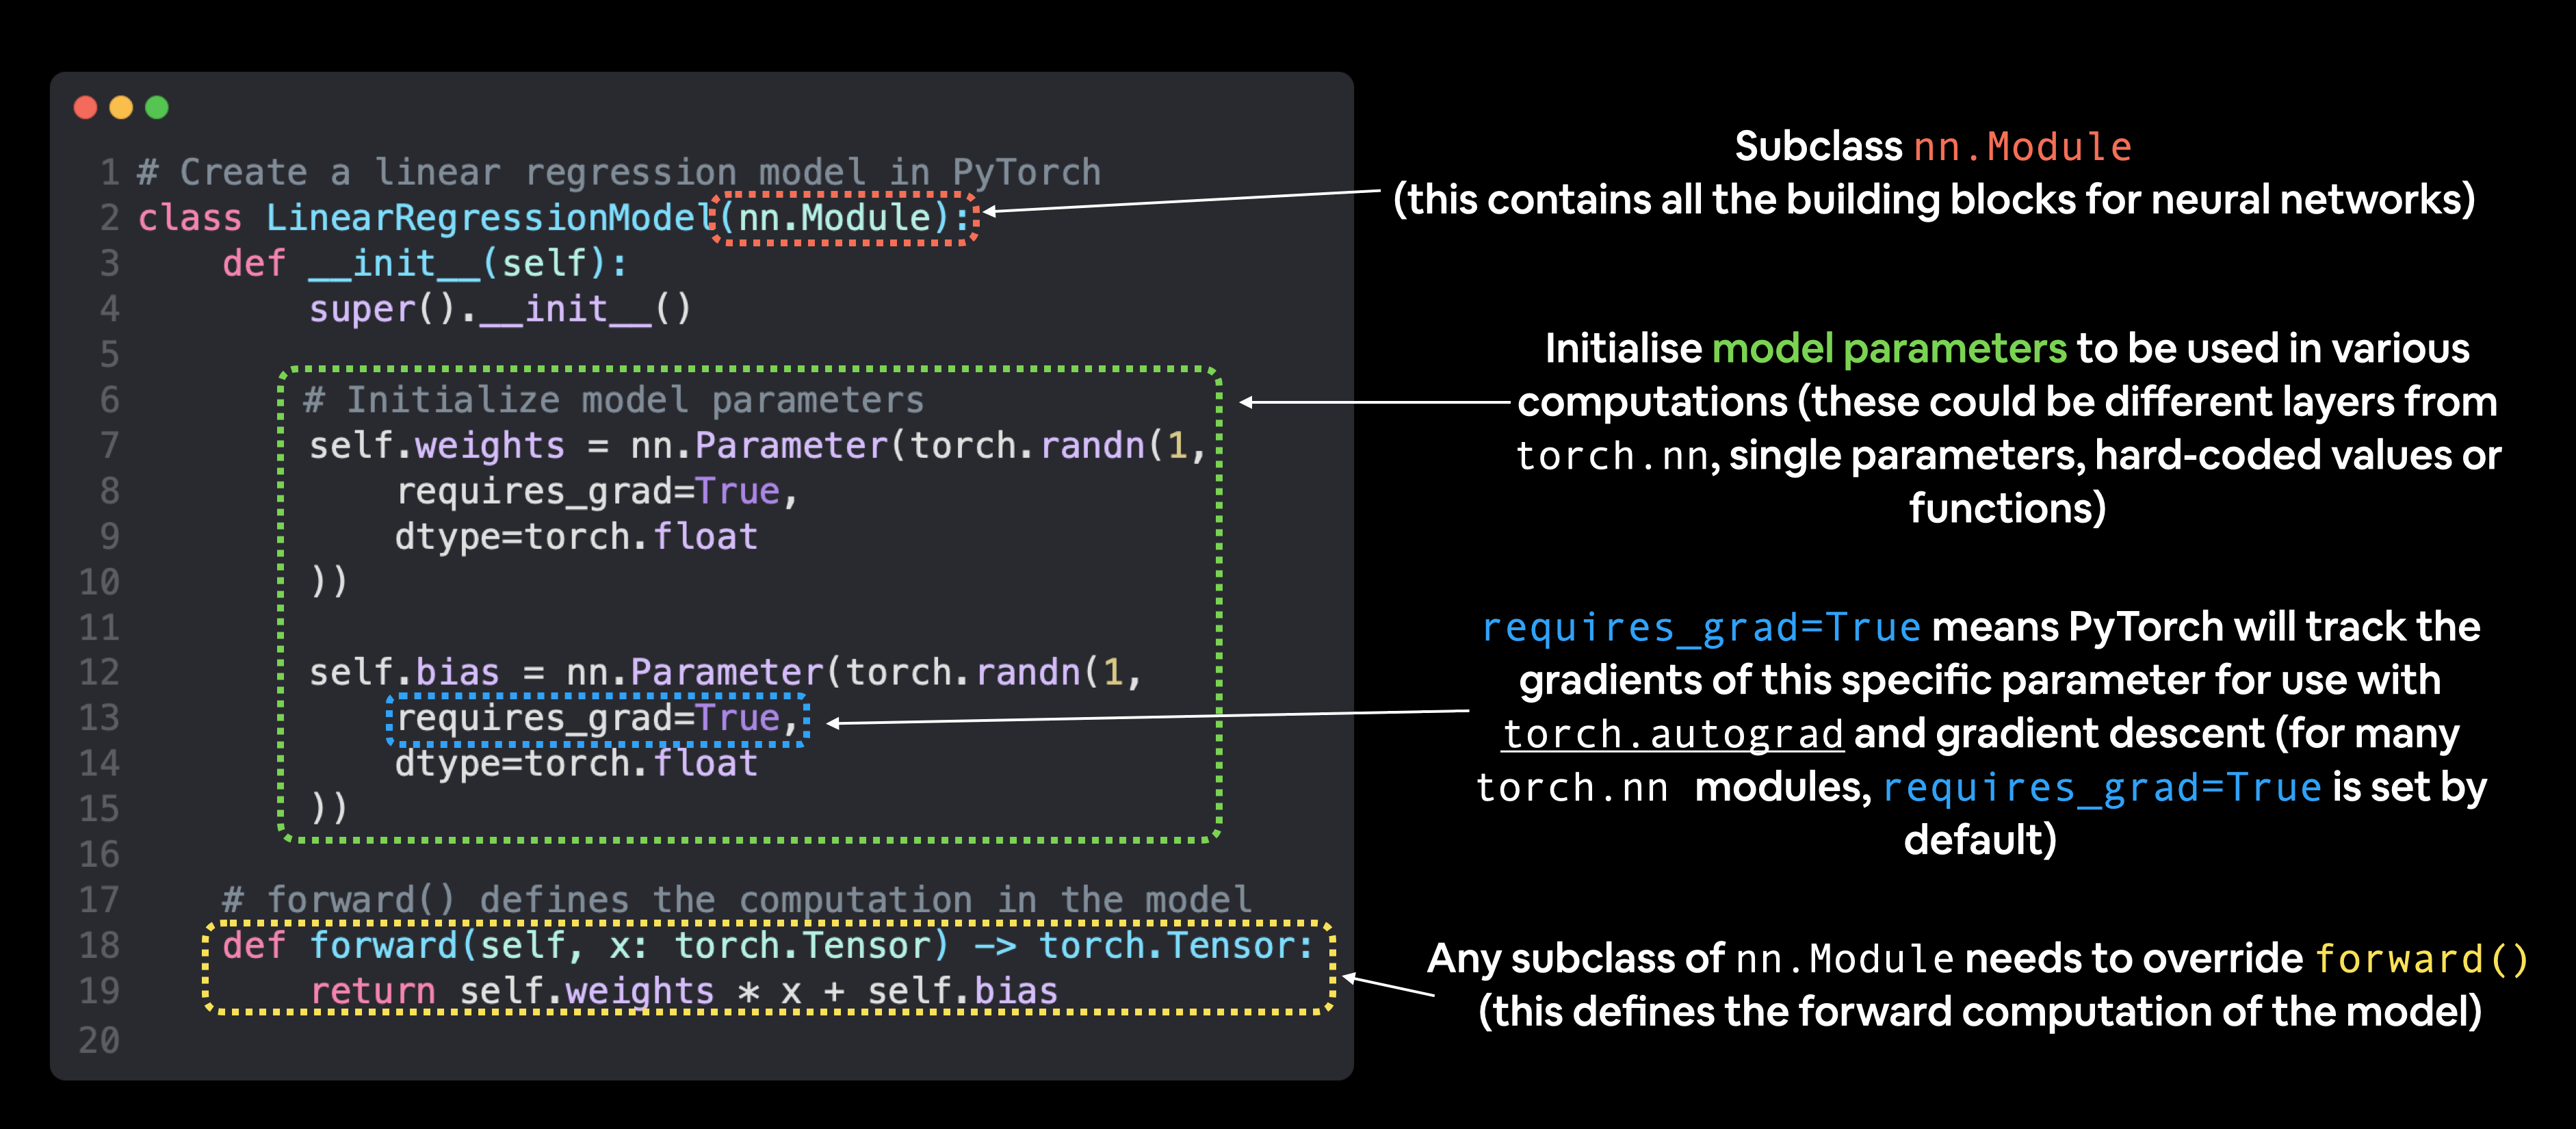

Basic building blocks of creating a PyTorch model by subclassing `nn.Module`. For objects that subclass `nn.Module`, the `forward()` method must be defined.

More of these essential modules and their use cases are in the [PyTorch Cheat Sheet](https://pytorch.org/tutorials/beginner/ptcheat.html)

#Checking the contents of a PyTorch model
Create a model instance with the class we've made and check its parameters using `.parameters()`.

In [10]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]


We can also get the state (what the model contains) of the model using
[`.state_dict()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.state_dict)

In [11]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Since we initialized the values for `weights` and `bias` from `model_0.state_dict()` above using `torch.randn()`, they come out as random float tensors.

Essentially we want to start from random parameters and get the model to update them towards parameters that fit our data best (the hardcoded `weight` and `bias` values we set when creating our straight line data).

Because our model starts with random values, right now it'll have poor predictive power.

#Making predictions using torch.inference_mode()

To check this we can pass it the test data `X_test` to see how closely it predicts `y_test`.

When we pass data to our model, it'll go through the model's `forward()` method and produce a result using the computation we've defined.

Now make some predictions.

In [12]:
# Make predictions with model
with torch.inference_mode(): #context manager
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

You probably noticed we used torch.inference_mode() as a [context manager ](https://realpython.com/python-with-statement/)(that's what the `with torch.inference_mode(): is`) to make the predictions.

As the name suggests, torch.inference_mode() is used when using a model for inference (making predictions).

`torch.inference_mode()` turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make **forward-passes** (data going through the forward() method) faster.

Note: In older PyTorch code, you may also see `torch.no_grad()` being used for inference. While `torch.inference_mode()` and `torch.no_grad()` do similar things, `torch.inference_mode()` is newer, potentially faster and preferred. See this [Tweet](https://x.com/PyTorch/status/1437838231505096708?s=20) from PyTorch for more.

In [13]:
# Visualize the predictions
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


Notice how there's one prediction value per testing sample. This is because of the kind of data we're using. For our straight line, one X value maps to one y value.

However, machine learning models are very flexible. You could have 100 X values mapping to one, two, three or 10 y values. It all depends on what you're working on.

Now let's visualize them with `plot_predictions()` function we created above.

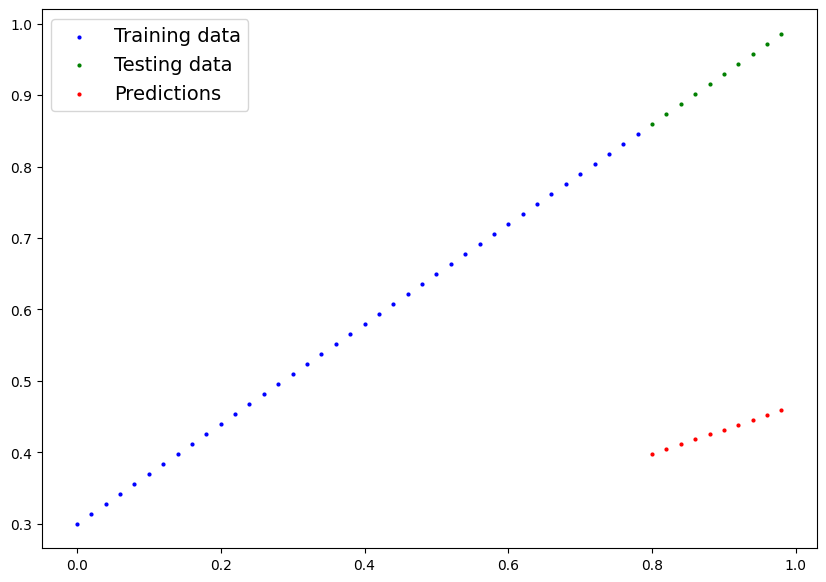

In [14]:
plot_predictions(predictions=y_preds)

In [15]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

Woah! These predictions look pretty bad...This makes sense though, this model is just using random parameter values to make predictions. It hasn't even looked at the blue dots to try to predict the green dots.

Now let's change that by training our model.

#3. Train model
Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly).

To fix that, we can update its internal parameters (patterns), the `weights` and `bias` values we set randomly using `nn.Parameter()` and `torch.randn()` to be something that better represents the data.

We could hard code this (since we know the default values weight=0.7 and bias=0.3) but where's the fun in that? Much of the time we won't know what the ideal parameters are for a model. Instead, we will write code to see if the model can try and figure them out itself.

#Creating a loss function and optimizer in PyTorch

For our model to update its parameters on its own, we'll need to add a few more things to our recipe: **loss function** as well as an **optimizer**.

The roles of these are:

##**Loss function:**

Measures how wrong your model's predictions (e.g. `y_preds`) are compared to the truth labels (e.g. `y_test`). Lower the better. PyTorch has plenty of built-in loss functions in `torch.nn`.

**Mean absolute error (MAE)** for regression problems (`torch.nn.L1Loss()`). **Binary cross entropy** for binary classification problems (`torch.nn.BCELoss()`).

##**Optimizer:**

Tells your model how to update its internal parameters to best lower the loss. You can find various optimization function implementations in `torch.optim`.

**Stochastic gradient descent** (`torch.optim.SGD()`). **Adam optimizer** (`torch.optim.Adam()`).

Let's create a loss function and an optimizer we can use to help improve our model. Depending on what kind of problem you're working on will depend on what loss function and what optimizer you use.

However, there are some common values, that are known to work well such as the **SGD (stochastic gradient descent)** or **Adam optimizer**. And the **MAE (mean absolute error) loss function** for regression problems (predicting a number) or **binary cross entropy loss function** for classification problems (predicting one thing or another).

For our problem, since we're predicting a number, let's use MAE (which is under `torch.nn.L1Loss()`) in PyTorch as our loss function.

**Mean absolute error** (MAE, in PyTorch: `torch.nn.L1Loss`) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.

And we'll use **SGD(stochastic gradient descent)**, `torch.optim.SGD(params, lr)` where:

* **params** is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).

* **lr** is the **learning rate** you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values).

The learning rate is considered a **hyperparameter** (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called **learning rate scheduling**).


In [16]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is the same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

#Creating an optimization loop in PyTorch
Now we've got a loss function and an optimizer, it's now time to create a training loop (and testing loop).

The training loop involves the model going through the training data and learning the relationships between the `features` and `labels`.

The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data (the model never sees the testing data during training).

Each of these is called a "loop" because we want our model to look (loop through) at each sample in each dataset.

#PyTorch training loop

1. Forward pass:

  The model goes through all of the training data once, performing its `forward()` function calculations. `model(x_train)`

2. Calculate the loss

   The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. `loss = loss_fn(y_pred, y_train)`

3. Zero gradients

   The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step. `optimizer.zero_grad()`

4. Perform backpropagation on the loss

   Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as **backpropagation**, hence "backwards". `loss.backward()`

5. Update the optimizer (**gradient descent**)


  Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. `optimizer.step()`





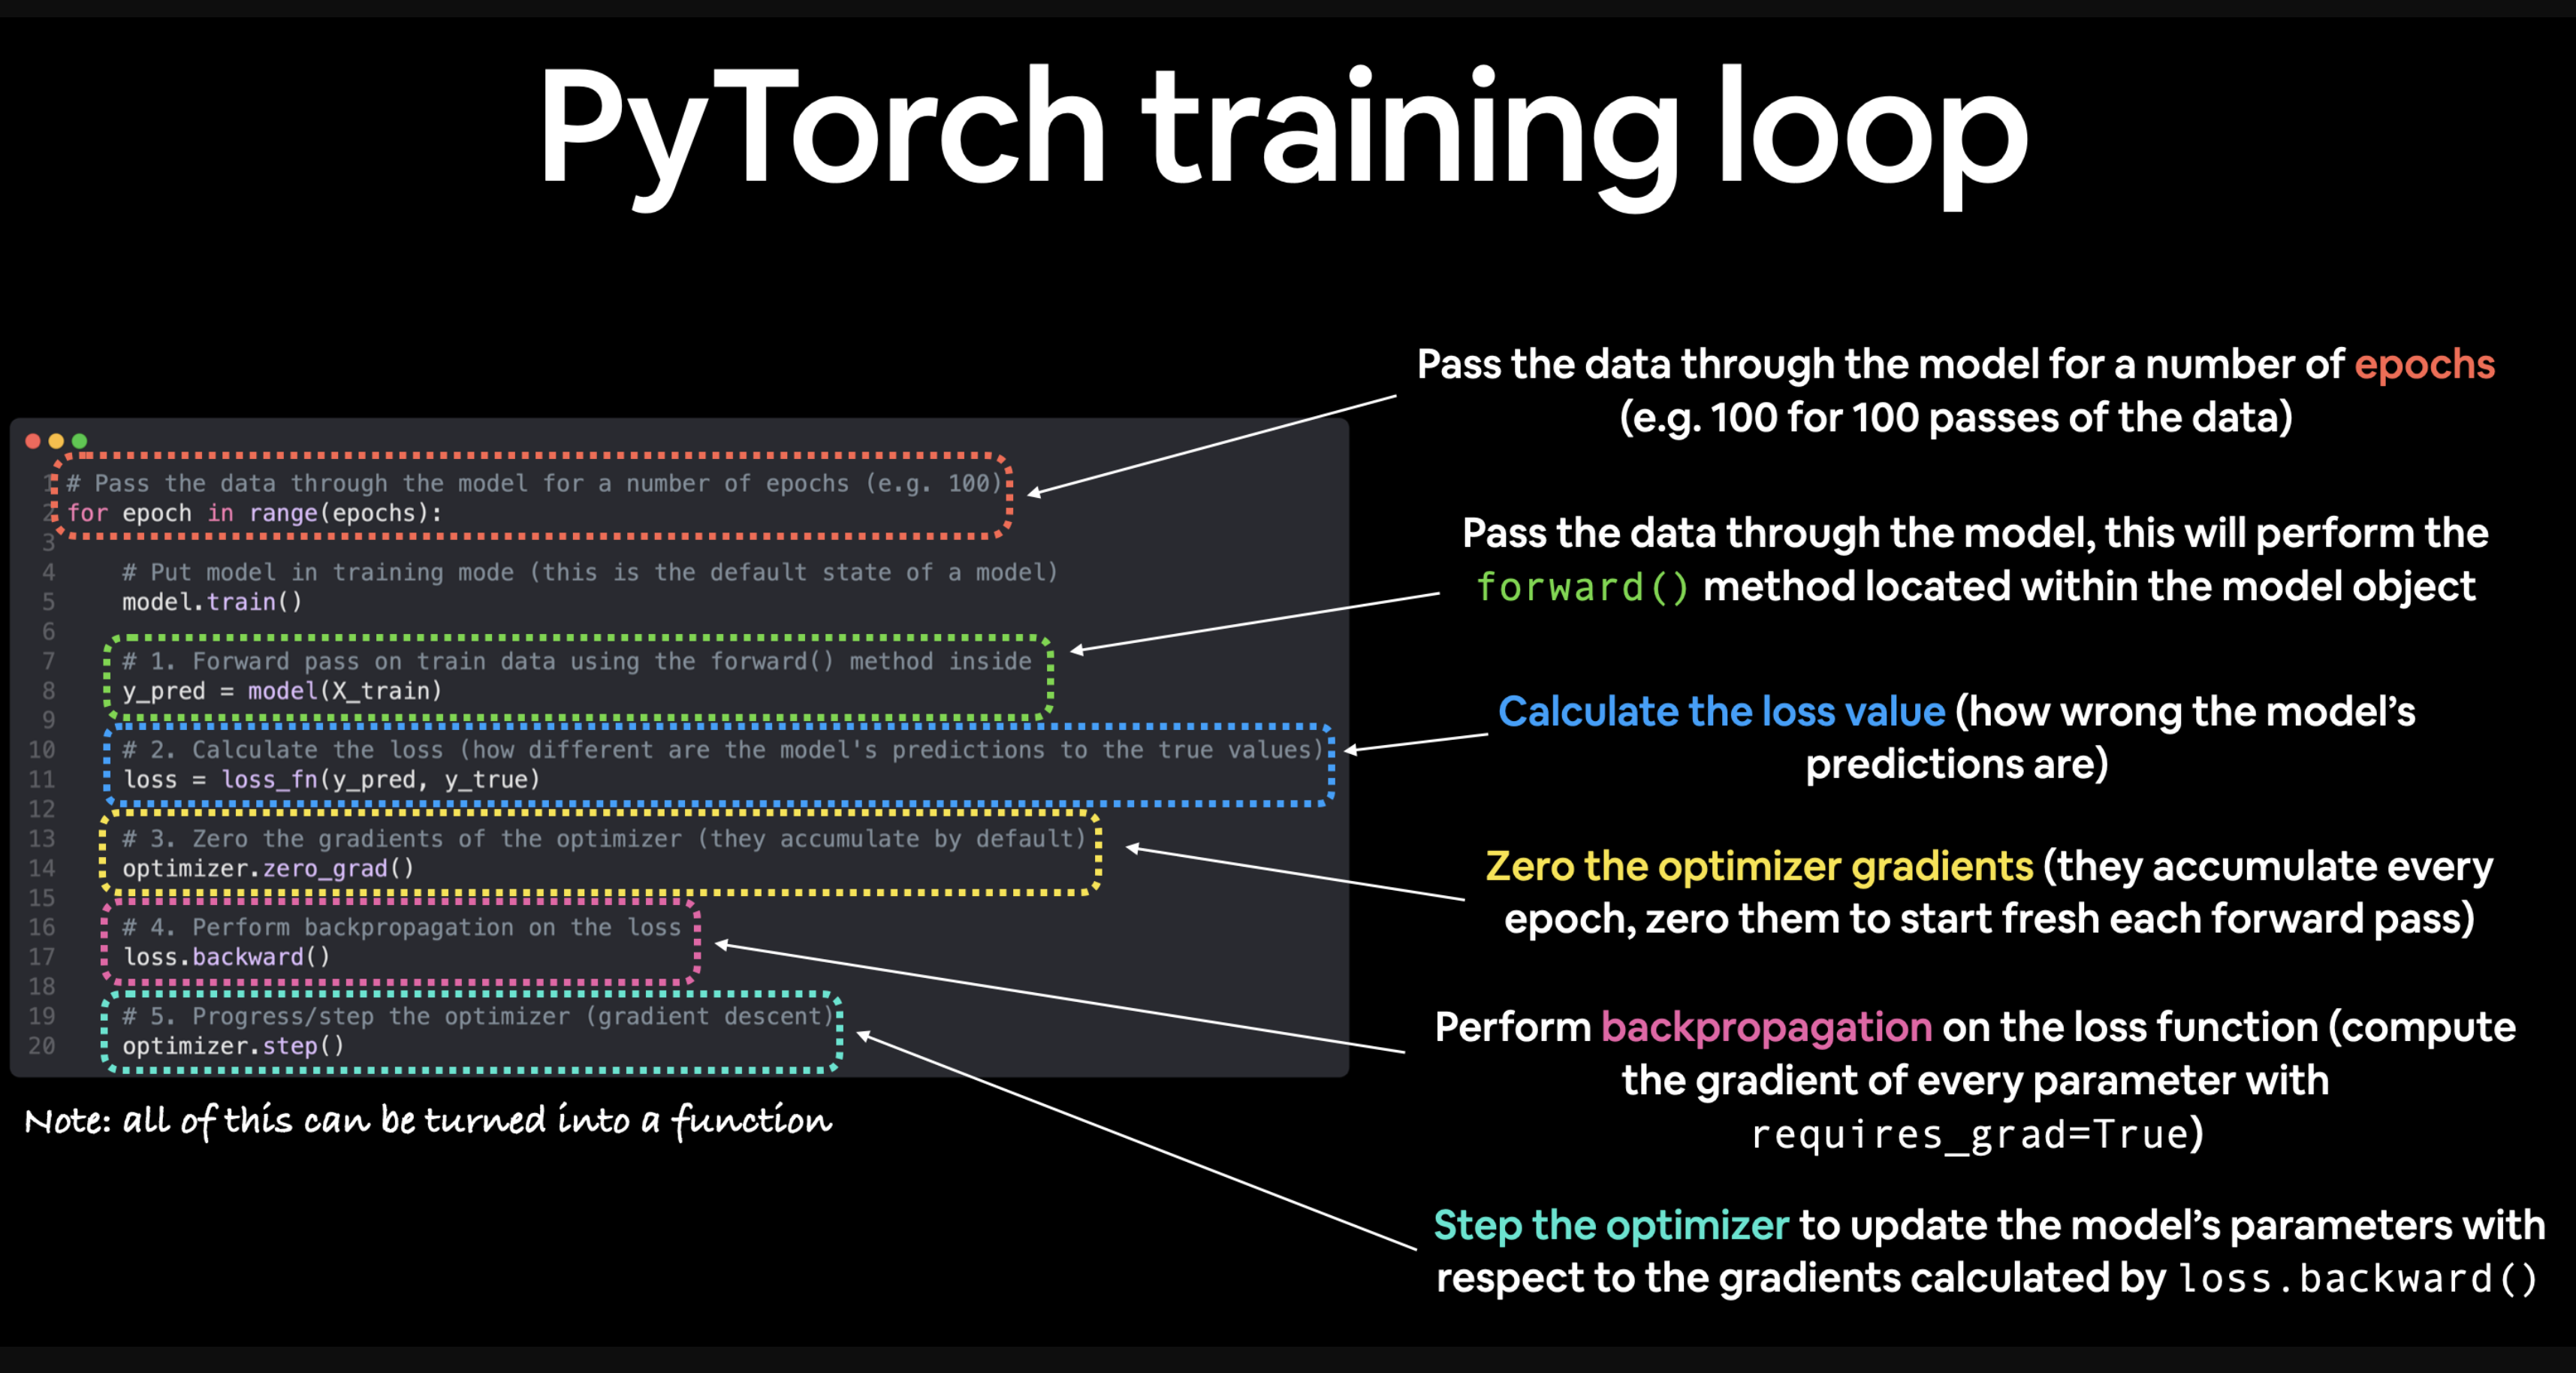

On the ordering of things, the above is a good default order but you may see slightly different orders. Some rules of thumb:

*   Calculate the loss (`loss = ...`) before performing backpropagation on it (`loss.backward()`).
*   Zero gradients (`optimizer.zero_grad()`) before computing the gradients of the loss with respect to every model parameter (`loss.backward()`).
*   Step the optimizer (`optimizer.step()`) after performing backpropagation on the loss (`loss.backward()`).

#PyTorch testing loop¶

As for the testing loop (evaluating our model), the typical steps include:

1. Forward pass

   The model goes through all of the testing data once, performing its `forward()` function calculations. `model(x_test)`

2. Calculate the loss

   The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are. `loss = loss_fn(y_pred, y_test)`

3. Calulate evaluation metrics (optional)

   Alongside the loss value you may want to calculate other evaluation metrics such as accuracy on the test set. Custom functions


